# Kat's Scraper Notebook
## Code Fellows 401d8 Python Midterm
Scrapes Indeed for salary information for a given keyword in a given city. Keywords are a list and multiple arguments are acceptable, but note that adding additional keywords drastically increases the time it takes for the scrape to run, since it is currently searching OR, not AND.

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define city and keywords
Accepts one city and multiple keywords in a list. Multi-word keywords must be separated with a plus sign.

In [2]:
city = 'Seattle'
keywords = ['UX+designer']

### The scraper itself, using BeautifulSoup
Creates a dataframe from the results of the scrap. Also handles cleaning up of some data in the salary field, since Indeed salary fields come in a variety of formats.

In [3]:
url_template = 'https://www.indeed.com/jobs?q={}&l={}&fromage=any&limit=100'
max_results = 100

df = pd.DataFrame(columns=['ux'])
requests.packages.urllib3.disable_warnings()
for keyword in keywords:
    for start in range(0, max_results):
        url = url_template.format(keyword, city)
        http = urllib3.PoolManager()
        response = http.request('GET', url)
        soups = BeautifulSoup(response.data.decode('utf-8'), 'html.parser')
        for b in soups.find_all('div', attrs={'class': ' row result'}):
            try:
                salary = b.find('span', attrs={'class': 'no-wrap'}).text
            except AttributeError:
                salary = 'NA'
            df = df.append({'ux': salary}, ignore_index=True)

            df.ux.replace(regex=True,inplace=True,to_replace='\n',value='')
            df.ux.replace(regex=True,inplace=True,to_replace='$',value='')
            df.ux.replace(regex=True,inplace=True,to_replace=' a year',value='')
            df.ux.replace(regex=True,inplace=True,to_replace='(Indeed est.)',value='')

### Cleanup
The next three cells clean up some data for us. We eliminate rows where there is no salary, remove 'a year', comma separation, and dollar signs. We also eliminate any rows that contain 'a day,' 'an hour,' or 'a month,' since we only want to work with annual salaries.

In [4]:
df = df.query('ux != "NA"')

In [5]:
df = df[df.ux.str.contains('a day') == False]
df = df[df.ux.str.contains('an hour') == False]
df = df[df.ux.str.contains('a month') == False]

In [6]:
df.ux = df.ux.str.replace('a year', '').str.replace(',', '').str.replace('$', '')

Here we just take a peek at the data to confirm the above reformatting is working correctly.

In [7]:
df.head()

,ux
2891,74000 - 94000 ()
2892,82000 - 104000 ()
2893,86000 - 110000 ()
2895,79000 - 101000 ()
2896,83000 - 105000 ()


### Taking lowest in the range
Since most of the salaries are listed as a range, we assume the worst-case scenario by splitting the salary on the dash and assigning the first index as a float to a list.

In [8]:
cleaned_salaries = []
for i in df.ux:
    a = i.split('-')
    cleaned_salaries.append(float(a[0]))

### Reassigning salaries
This replaces the salary column in the dataframe with the values from the list we made above.

In [9]:
df.ux = cleaned_salaries

In [10]:
# df

### Write to CSV
We write our results to a CSV because this scrape is kind of large and it takes foreverrrrr. We want to do things with this data, but we don't want to have to run the scrapes repeatedly.

In [11]:
df.to_csv('uxresults.csv', encoding='utf-8', index=False)

## Let's chart some salaries!
First, read them into dataframes from the CSVs we made.

In [22]:
c_plus = pd.read_csv('cplusresults.csv')
python = pd.read_csv('pythonresults.csv')
javascript = pd.read_csv('javascriptresults.csv')
java = pd.read_csv('javaresults.csv')
php = pd.read_csv('phpresults.csv')
csharp = pd.read_csv('csharpresults.csv')
datascience = pd.read_csv('datascienceresults.csv')
softwaredev = pd.read_csv('softwaredevresults.csv')
webdev = pd.read_csv('webdevresults.csv')
dba = pd.read_csv('DBAresults.csv')
ux = pd.read_csv('uxresults.csv')

### Concatenating them into relevant dataframes

In [35]:
languages = pd.concat([c_plus, python, javascript, java, php, csharp], axis=1)

In [36]:
languages.head()

,Cplus,python,javascript,java,php,csharp
0,150000.0,75000.0,70000.0,150000.0,90000.0,50000.0
1,150000.0,70000.0,70000.0,140000.0,70000.0,60000.0
2,150000.0,75000.0,65000.0,60000.0,70000.0,80000.0
3,150000.0,75000.0,50000.0,120000.0,60000.0,50000.0
4,150000.0,75000.0,50000.0,70000.0,45000.0,150000.0


In [14]:
jobs = pd.concat([datascience, softwaredev, webdev, dba, ux])

### Get median values for each

In [15]:
median_languages = languages.median()

In [16]:
median_jobs = jobs.median()

### Let's just plot the distributions of some languages

Text(0,0.5,'Python')

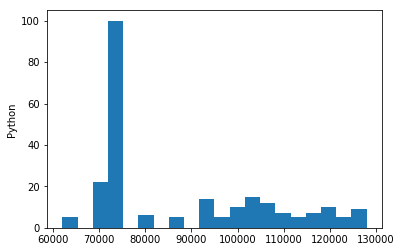

In [30]:
python = pd.read_csv('pythonresults.csv')
plt.hist(python.python, bins=20)
plt.ylabel('Python')

Text(0,0.5,'Javascript')

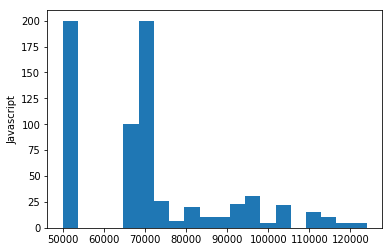

In [32]:
javascript = pd.read_csv('javascriptresults.csv')
plt.hist(javascript.javascript, bins=20)
plt.ylabel('Javascript')

Text(0,0.5,'C++')

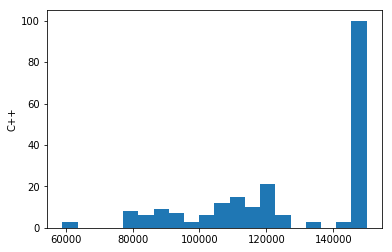

In [39]:
c_plus = pd.read_csv('cplusresults.csv')
plt.hist(c_plus.Cplus, bins=20)
plt.ylabel('C++')